# Computer Vision Contours

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Contours

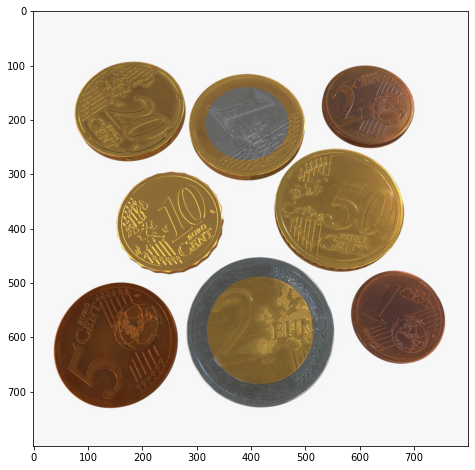

In [2]:
# Have a look at the image below
color_coins = cv2.imread('img/coins5.jpg', cv2.IMREAD_COLOR)
rgb_coins = cv2.cvtColor(color_coins,cv2.COLOR_BGR2RGB)

plt.figure(figsize = (12,8))
plt.imshow(rgb_coins);

In [4]:
# Convert the image above to grayscale
gray_coins = cv2.cvtColor(color_coins,cv2.COLOR_BGR2GRAY)


In [10]:
# Apply some gaussian blur to it (try differente size kernels)
gray_copy = gray_coins.copy()
gaus_blur_coins = cv2.GaussianBlur(gray_copy, (5,5), 0)

In [13]:
# Apply Canny to find edges and display the image 
canny_coins = cv2.Canny(gaus_blur_coins, 100, 200)

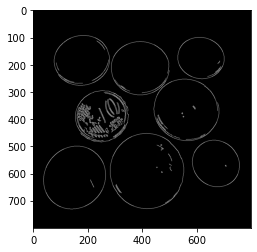

In [14]:
plt.imshow(canny_coins, cmap='gray')

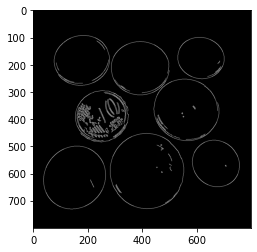

In [18]:
# Now find the contours on the image where you applied canny as well as in the grayscale image
# Draw the contours on the images (or better yet on copies of the images)
# Display the images, how does it look like?
ret, thresh = cv2.threshold(canny_coins, 127, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

In [23]:
coin_contours, h = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

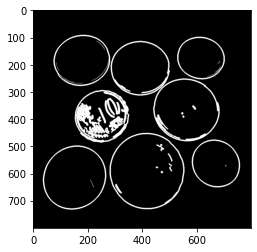

In [32]:
canny_copy = canny_coins.copy() 

cv2.drawContours(canny_copy, coin_contours, -1, (255,255,255), 3)
plt.imshow(canny_copy, cmap='gray')

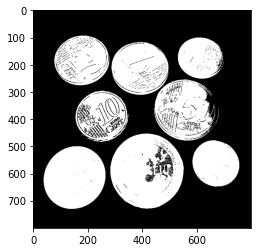

In [34]:
#grayscale image 
ret, thresh = cv2.threshold(gray_copy, 127, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh, cmap='gray')

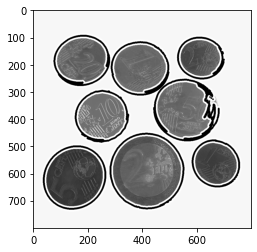

In [47]:
coin_contours, h = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cv2.drawContours(gray_copy, coin_contours, -1, (0,255,0), 5)
plt.imshow(gray_copy, cmap='gray') 

[Hint](# "You will need to use cv2.findContours and cv2.drawContours") 

In [49]:
# print the number of contours that has been found
print(f'number of contours from grayscale image: {len(coin_contours)}')

number of contours from grayscale image: 80


[Hint](# "Simply use the built it python len funtion -> len(coins_contours)") 

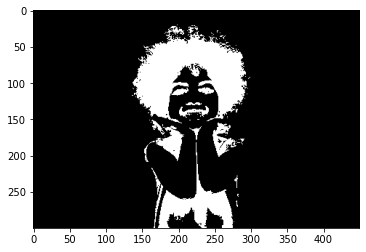

In [60]:
# Load your own images and try the same, Note:
# applying gaussian blur and canny is not necessary but can be useful to clean up the image and get rid of noise
image = cv2.imread('img/girl .jpg')
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img = img_gray.copy()

ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh, cmap='gray');

In [61]:
img_contours, h = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

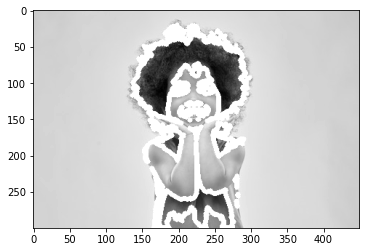

In [62]:
cv2.drawContours(img, img_contours, -1, (255,255,255),5)
plt.imshow(img, cmap='gray')

## Sorting Contours

### By area

In [63]:
def get_contour_areas(contours):
    all_areas = []
    for contour in contours:
        contour_area = cv2.contourArea(contour)
        all_areas.append(contour_area)
    return all_areas

In [ ]:
# We can sort contours with any function, a really useful way of sorting is by area, in many situations we might
# only want to find the biggest or smallest contours, I'm providing the function I use to get all contour areas
# This function is useful to be able to see at a glance all contours areas and get a sense of what is the biggest 
# And which one is the smallest one, however we will not use this to sort them we can just pass cv2.contourArea 
# To the function that is going to be sorting it later
# Call get_contour_areas an pass in the list of contours you got with openCV and then store the results in a var


In [64]:
# Print the contour areas to screen
get_contour_areas(img_contours)

[0.0,
 0.0,
 0.0,
 0.0,
 3.0,
 1.5,
 87.5,
 11.0,
 0.0,
 57.5,
 31.0,
 0.0,
 0.0,
 0.0,
 3253.5,
 0.0,
 2.0,
 0.0,
 8.0,
 0.0,
 0.0,
 0.0,
 53.0,
 762.5,
 0.0,
 647.5,
 0.0,
 0.0,
 89.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.5,
 0.0,
 196.5,
 0.0,
 0.0,
 37.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 110.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 5.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.0,
 0.0,
 0.5,
 2.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5,
 0.0,
 6.0,
 0.0,
 21.0,
 0.0,
 10244.5,
 0.0,
 0.0,
 0.0]

In [85]:
# Now sort the areas by biggest to smallest and print the sorted areas
sorted_contours = sorted(img_contours, key=cv2.contourArea, reverse=True)
sorted_contours

[array([[[191,  22]],
 
        [[190,  23]],
 
        [[189,  24]],
 
        ...,
 
        [[194,  22]],
 
        [[193,  22]],
 
        [[192,  22]]], dtype=int32),
 array([[[224, 182]],
 
        [[224, 183]],
 
        [[224, 184]],
 
        ...,
 
        [[224, 185]],
 
        [[224, 184]],
 
        [[224, 183]]], dtype=int32),
 array([[[190, 159]],
 
        [[189, 160]],
 
        [[189, 161]],
 
        [[188, 162]],
 
        [[187, 161]],
 
        [[186, 161]],
 
        [[185, 161]],
 
        [[184, 161]],
 
        [[183, 162]],
 
        [[182, 162]],
 
        [[181, 162]],
 
        [[180, 161]],
 
        [[179, 161]],
 
        [[180, 161]],
 
        [[181, 162]],
 
        [[182, 163]],
 
        [[182, 164]],
 
        [[183, 165]],
 
        [[184, 166]],
 
        [[184, 165]],
 
        [[185, 164]],
 
        [[186, 164]],
 
        [[187, 165]],
 
        [[188, 165]],
 
        [[189, 164]],
 
        [[190, 165]],
 
        [[190, 166]],
 
        

[Hint](# "Use the built it python sorted funtion pass in the cv2.contourArea as the key for sorting") 

In [67]:
# Now sort the areas in the opposite way smallest to biggest and print the sorted areas
sorted_contours = sorted(img_contours, key=cv2.contourArea, reverse=False)
sorted_contours

[array([[[276, 291]]], dtype=int32),
 array([[[205, 290]]], dtype=int32),
 array([[[201, 288]],
 
        [[202, 288]]], dtype=int32),
 array([[[195, 287]]], dtype=int32),
 array([[[280, 228]],
 
        [[281, 228]]], dtype=int32),
 array([[[279, 183]]], dtype=int32),
 array([[[286, 182]],
 
        [[287, 183]],
 
        [[288, 184]],
 
        [[287, 183]]], dtype=int32),
 array([[[281, 182]],
 
        [[282, 182]],
 
        [[283, 182]],
 
        [[284, 182]],
 
        [[283, 182]],
 
        [[282, 182]]], dtype=int32),
 array([[[280, 180]]], dtype=int32),
 array([[[283, 178]]], dtype=int32),
 array([[[181, 173]]], dtype=int32),
 array([[[265, 172]]], dtype=int32),
 array([[[207, 171]]], dtype=int32),
 array([[[178, 157]],
 
        [[178, 158]],
 
        [[178, 159]],
 
        [[178, 158]]], dtype=int32),
 array([[[162, 154]]], dtype=int32),
 array([[[215, 151]],
 
        [[216, 151]]], dtype=int32),
 array([[[160, 151]]], dtype=int32),
 array([[[226, 150]],
 
        [[2

In [86]:
# Filter out only the 5 biggest contours and print them
c = sorted_contours[0:5]

[Hint](# "Just slice the array!") 

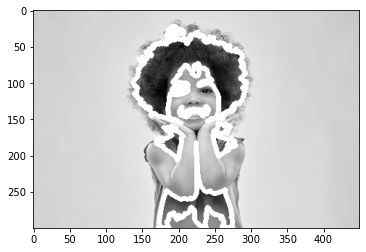

In [87]:
# Now in a clean image draw the contours you just filtered out and display it
#Getting image
image = cv2.imread('img/girl .jpg')
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img = img_gray.copy()

#Applying threshold
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

#Getting contours
img_contours, h = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

#Drawing contours
cv2.drawContours(img, c, -1, (255,255,255),5)
plt.imshow(img, cmap='gray');

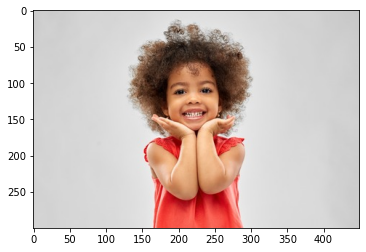

In [84]:
plt.imshow((cv2.cvtColor(image, cv2.COLOR_BGR2RGB)));

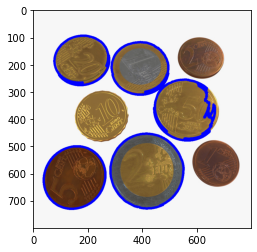

In [99]:
# Repeat the same with your own images, practice sorting contours and think of how it can be useful
# You might need to sort them by something else, just be creative!
# Now in a clean image draw the contours you just filtered out and display it
#Getting image
image = cv2.imread('img/coins5.jpg')
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img = img_gray.copy()
im = image.copy()

#Applying threshold
ret, thresh = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)

#Getting contours
img_contours, h = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

#Sorting contours
sorted_contours = sorted(img_contours, key=cv2.contourArea, reverse=True)
c = sorted_contours[0:5]

#Drawing contours
cv2.drawContours(im, c, -1, (255,0,0),8)
plt.imshow(im[:,:,::-1]);

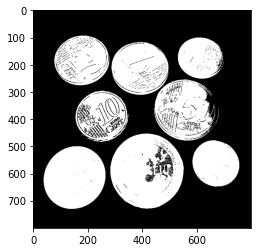

In [93]:
plt.imshow(thresh, cmap='gray')

### By X coordinate (left to right)

In [ ]:
def get_contour_x_center_coordinate(contours):    
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return(int(M['m10']/M['m00']))

[OpenCV Moments](https://www.learnopencv.com/find-center-of-blob-centroid-using-opencv-cpp-python/)

In [100]:
def get_contour_x_center_coordinate(contours):
    x_coordinate = []
    img_coord = img_gray.copy()
    for contour in contours:
        if cv2.contourArea(contour) > 10:
            M = cv2.moments(contour)
            x_coord = int(M['m10']/M['m00'])
            x_coordinate.append(x_coord)
    return x_coordinate

In [102]:
get_contour_x_center_coordinate(img_contours)

[152, 670, 417, 252, 642, 551, 391, 613, 178]

In [116]:
# This is an useful function you can use when you need to sort contours left to right
# Sort the contours this time left to right
sorted_contours = sorted(img_contours, key=get_contour_x_center_coordinate, reverse=False)

In [117]:
c = sorted_contours[0:9]

In [115]:
len(c)

9

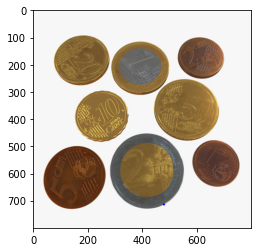

In [122]:
# Draw the contours one at a time and display the images on screen 

im = image.copy()
cv2.drawContours(im, sorted_contours, 0, (255,0,0), 8)
plt.imshow(im[:,:,::-1]);

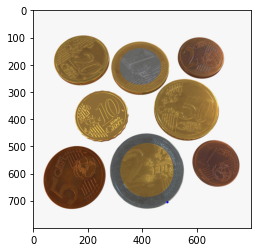

In [125]:
im = image.copy()
cv2.drawContours(im, sorted_contours, 1, (255,0,0), 8)
plt.imshow(im[:,:,::-1]);

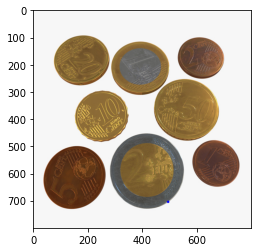

In [126]:
im = image.copy()
cv2.drawContours(im, sorted_contours, 2, (255,0,0), 8)
plt.imshow(im[:,:,::-1]);

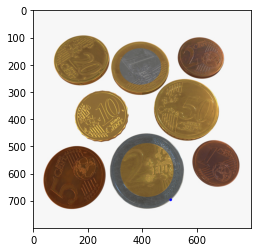

In [127]:
im = image.copy()
cv2.drawContours(im, sorted_contours, 3, (255,0,0), 8)
plt.imshow(im[:,:,::-1]);

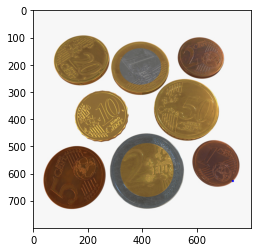

In [128]:
im = image.copy()
cv2.drawContours(im, sorted_contours, 4, (255,0,0), 8)
plt.imshow(im[:,:,::-1]);

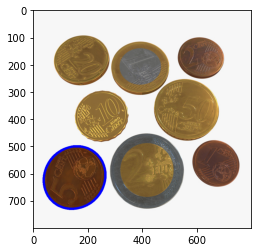

In [129]:
im = image.copy()
cv2.drawContours(im, sorted_contours, 5, (255,0,0), 8)
plt.imshow(im[:,:,::-1]);

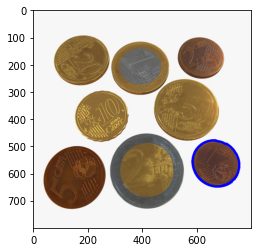

In [130]:
im = image.copy()
cv2.drawContours(im, sorted_contours, 6, (255,0,0), 8)
plt.imshow(im[:,:,::-1]);

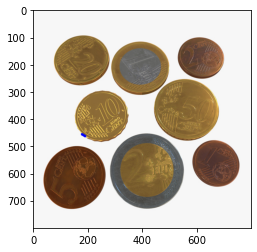

In [131]:
im = image.copy()
cv2.drawContours(im, sorted_contours, 7, (255,0,0), 8)
plt.imshow(im[:,:,::-1]);

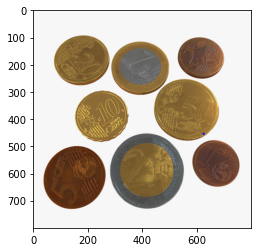

In [132]:
im = image.copy()
cv2.drawContours(im, sorted_contours, 8, (255,0,0), 8)
plt.imshow(im[:,:,::-1]);

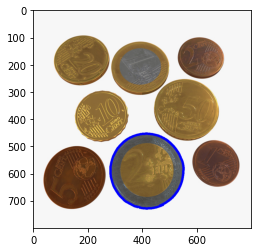

In [133]:
im = image.copy()
cv2.drawContours(im, sorted_contours, 9, (255,0,0), 8)
plt.imshow(im[:,:,::-1]);

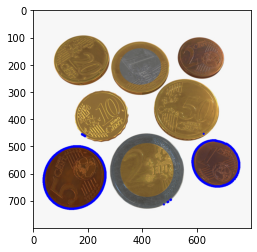

In [134]:
im = image.copy()
cv2.drawContours(im,c, -1, (255,0,0), 8)
plt.imshow(im[:,:,::-1]);

[Hint](# "You can just extract the one contour at a time from the list and pass it in to drawContours as a new list that contains that only one contour, you can use a for loop to iterate the contours") 

In [ ]:
# Can you think of other ways to sort contours?
